<a href="https://colab.research.google.com/github/Akshatpattiwar512/Letsupgrade-Advance-Data-Science/blob/main/Project_1_Titanic_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
data = pd.read_csv("train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
print("Shape of data is :",data.shape)
data.info()

Shape of data is : (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# Replacing 1 as yes and 0 as no. 
data["Survived"] = data["Survived"].map({1:"yes" , 0 :"no"})
data["Survived"].value_counts()

no     549
yes    342
Name: Survived, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


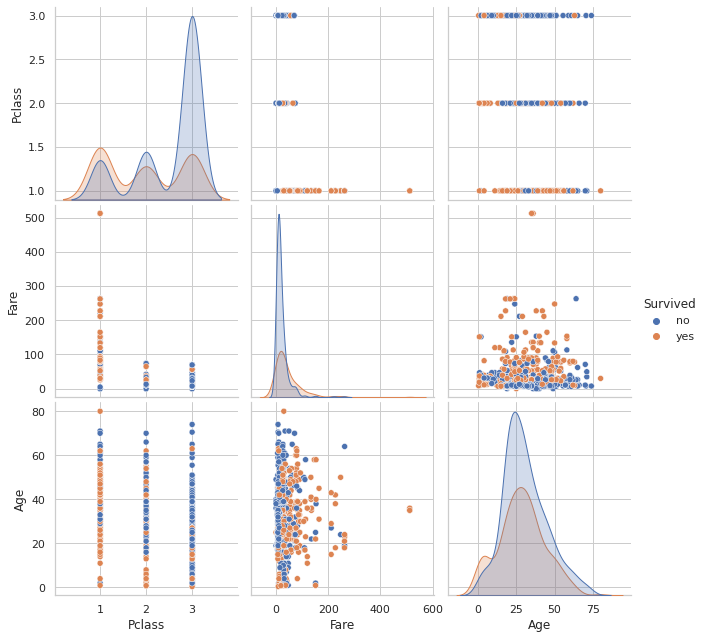

In [9]:
# here we take only 4 features to  perform analysis.
sns.set_style("whitegrid");
sns.pairplot(data[["Survived","Pclass","Fare","Age"]], hue="Survived", size=3);
plt.show()

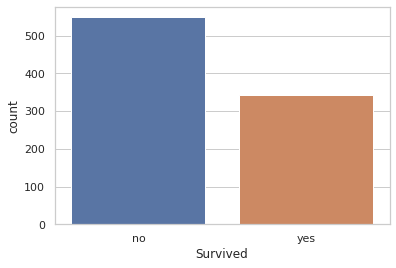

In [11]:
# Countplot counts the each category of value and plot that.
sns.countplot(data['Survived'],data = data)

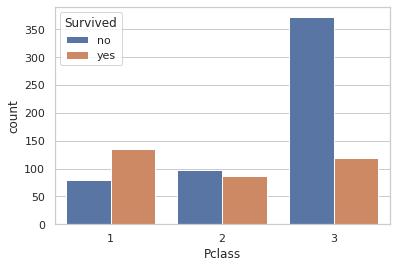

In [12]:
sns.countplot(data["Pclass"],hue = data["Survived"],data = data)

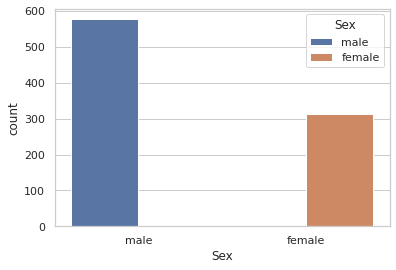

In [13]:
sns.countplot(data["Sex"],hue = data["Sex"],data = data)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


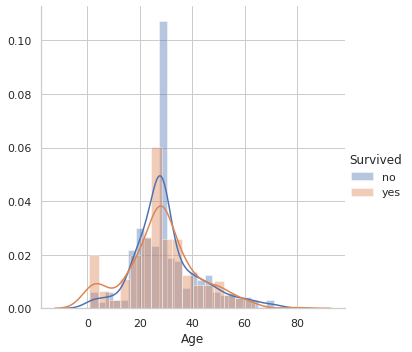

In [14]:
# Filling null Values
data = data.fillna(28)
# plotting Pdfs
sns.FacetGrid(data, hue="Survived", size=5) \
   .map(sns.distplot, "Age") \
   .add_legend()
plt.show()

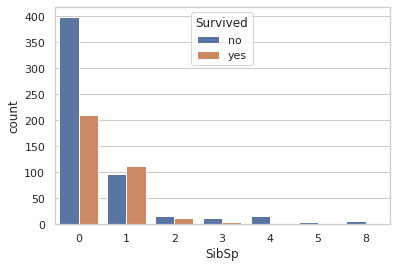

In [15]:
sns.countplot(data["SibSp"],hue = data["Survived"],data = data)

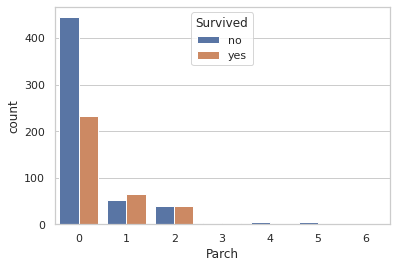

In [16]:
sns.countplot(data["Parch"],hue = data["Survived"],data = data)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


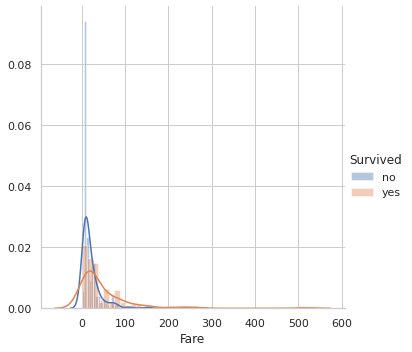

In [19]:
sns.FacetGrid(data, hue='Survived', size=5) \
 .map(sns.distplot, 'Fare') \
 .add_legend();
plt.show();

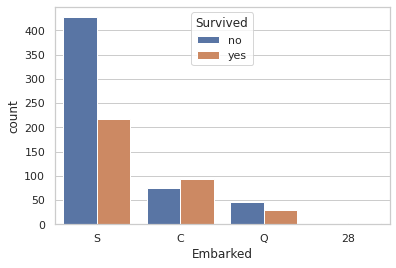

In [20]:
sns.countplot(data["Embarked"],hue = data["Survived"],data = data)

In [21]:
data = data.drop(["PassengerId", "Name" , "Ticket" , "Cabin"],axis = 1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,no,3,male,22.0,1,0,7.2500,S
1,yes,1,female,38.0,1,0,71.2833,C
2,yes,3,female,26.0,0,0,7.9250,S
3,yes,1,female,35.0,1,0,53.1000,S
4,no,3,male,35.0,0,0,8.0500,S
